## 산술연산
- 행/열 인덱스를 기준으로 모든 원소를 정렬한다.
- 동일한 위치에 있는 원소끼리 일대일 대응시킨다.
- 일대일 대응이 되는 원소끼리 연산을 처리한다.

In [8]:
# 시리즈 vs 시리즈
# 라이브러리 불러오기
import pandas as pd

# 딕셔너리 데이터로 판다스 시리즈 만들기
st1 = pd.Series({'국어':100, '영어':80, '수학':90})
st2 = pd.Series({'수학':80, '국어':90, '영어':80})

print(st1)
print()
print(st2)
print()

국어    100
영어     80
수학     90
dtype: int64

수학    80
국어    90
영어    80
dtype: int64



In [16]:
# 두 학새의 과목별 점수로 사칙연산 수행
add = st1 + st2
sub = st1 - st2
mul = st1 * st2
div = round((st1 / st2), 2)

print(add)
print(type(add))
print()
print(sub)
print(type(sub))
print()
print(mul)
print(type(mul))
print()
print(div)
print(type(div))

result = pd.DataFrame([add, sub, mul, div], index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
display(result)

국어    190
수학    170
영어    160
dtype: int64
<class 'pandas.core.series.Series'>

국어    10
수학    10
영어     0
dtype: int64
<class 'pandas.core.series.Series'>

국어    9000
수학    7200
영어    6400
dtype: int64
<class 'pandas.core.series.Series'>

국어    1.11
수학    1.12
영어    1.00
dtype: float64
<class 'pandas.core.series.Series'>


,국어,수학,영어
덧셈,190.00,170.00,160.0
뺄셈,10.00,10.00,0.0
곱셈,9000.00,7200.00,6400.0
나눗셈,1.11,1.12,1.0


In [19]:
# NaN을 포함한 연산 결과는 NaN으로 처리
# 해당 인덱스가 존재하지 않은 경우도 NaN을 반환
import numpy as np

st1 = pd.Series({'국어':np.nan, '영어':80, '수학':90})
st2 = pd.Series({'수학':80, '국어':90})

add = st1 + st2
sub = st1 - st2
mul = st1 * st2
div = round((st1 / st2), 2)

result = pd.DataFrame([add, sub, mul, div], index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
display(result)

,국어,수학,영어
덧셈,NaN,170.00,NaN
뺄셈,NaN,10.00,NaN
곱셈,NaN,7200.00,NaN
나눗셈,NaN,1.12,NaN


###### Q. 데이터프레임 result에서 NaN 값을 0으로 대체하세요.
- 연산 메소드 사용, NaN 대신 0으로 입력(sr_add = student1.add(student2, fill_value=0))

In [20]:
import numpy as np
st1 = pd.Series({'국어':np.nan, '영어':80, '수학':90})
st2 = pd.Series({'수학':80, '국어':90})

# NaN 값이 있는 시리즈 연산
# 객체 사이에 공통 인덱스가 없거나 NaN이 포함된 경우 연산 결과는 NaN으로 반환
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 두 학생의 과목별 점수로 사칙연산 수행 (연산 메소드 사용, fill_value=0)
# st1 국어 점수와 st2 영어 점수는 NaN 대신 0으로 입력
sr_add = st1.add(st2, fill_value=0)
sr_sub = st1.sub(st2, fill_value=0)
sr_mul = st1.mul(st2, fill_value=0)
sr_div = st1.div(st2, fill_value=0)

result = pd.DataFrame([sr_add, sr_sub, sr_mul, sr_div], index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
display(result)

,국어,수학,영어
덧셈,90.0,170.000,80.0
뺄셈,-90.0,10.000,80.0
곱셈,0.0,7200.000,0.0
나눗셈,0.0,1.125,inf


## CSV 파일 읽고, 저장하기

In [1]:
with open("read_csv_sample.csv", "w") as f:
    f.write("3")

In [7]:
# 라이브러리 불러오기
import pandas as pd

# 파일경로를 찾고, 변수 file_path에 저장
file_path = "read_csv_sample.csv"

# read_csv() 함수로 데이터프레임 변환. 변수 df1에 저장
df1 = pd.read_csv(file_path)
display(df1)
display(type(df1))

,c0,c1,c2,c3,c4
0,3,4,5,6,8
1,1,2,3,4,5
2,5,2,4,6,5


pandas.core.frame.DataFrame

In [8]:
# read_csv() 함수로 데이터프레임 변환. 변수 df2에 저장. header=None 옵션
df2 = pd.read_csv(file_path, header=None)
print(df2)

    0    1    2    3    4
0  c0   c1   c2   c3   c4
1   3    4    5    6    8
2   1    2    3    4    5
3   5    2    4    6    5


In [9]:
# read_csv() 함수로 데이터프레임 변환, 변수 df3에 저장. index_col-None 옵션
df3 = pd.read_csv(file_path, index_col = None)
print(df3)

   c0   c1   c2   c3   c4
0   3    4    5    6    8
1   1    2    3    4    5
2   5    2    4    6    5


In [10]:
# read_csv() 함수로 데이터프레임 변환, 변수 df4에 저장. index_col-None 옵션
df4 = pd.read_csv(file_path, index_col = 0)
print(df4)

     c1   c2   c3   c4
c0                    
3     4    5    6    8
1     2    3    4    5
5     2    4    6    5


In [11]:
# 데이터프레임을 csv 파일로 저장
df4.to_csv("df5.csv")
df5 = pd.read_csv("df5.csv")
df5

,c0,c1,c2,c3,c4
0,3,4,5,6,8
1,1,2,3,4,5
2,5,2,4,6,5


In [ ]:
# 엑셀 파일 열기 : xlrd 라이브러리 설치

## JSON 파일 읽고 쓰기

In [12]:
# JSON 파일은 데이터 공유 목적으로 개발된 특수한 파일
df4.to_json("df_j.json")
df_j = pd.read_json("df_j.json")
df_j

,c1,c2,c3,c4
3,4,5,6,8
1,2,3,4,5
5,2,4,6,5


## 바이너리 파일로 읽고 쓰기

In [13]:
# 데이터 프레임을 바이너리 파일로 저장
df5.to_pickle("df6.pkl")
df6 = pd.read_pickle("df6.pkl")
df6

,c0,c1,c2,c3,c4
0,3,4,5,6,8
1,1,2,3,4,5
2,5,2,4,6,5


- 파이썬 외장함수(pickle)
- pickle은 객체의 형태로 유지하면서 파일에 저장하고 불러올 수 있게 하는 모듈
- dump() 함수를 이용하여 딕셔너리 객체인 data를 파일에 저장

In [14]:
import pickle
f = open("text.txt", "wb")
data = {1:"python", 2:"you need"}
pickle.dump(data,f)
f.close()

In [15]:
# pickle.load 를 이용해서 딕셔너리 객체 상태 그대로 불러올 수 있음
import pickle
f = open('text.txt','rb')
data=pickle.load(f)
print(data)

{1: 'python', 2: 'you need'}


In [16]:
# 현재 작업 폴더 알고싶을 경우
import os
os.getcwd() #현재 작업폴더 위치 호출

'C:\\Users\\USER\\workspace\\ml_python'

### 타이타닉 생존자 예측모델 개발 및 평가(아래 사항들 반영 필수)
###### Titanic data 전처리
- 분석 데이터 : train.csv
- 재사용 가능한 전처리 사용자 함수 작성 하여 일괄 전처리 Null값 처리 : Age는 평균 나이, 나머지 칼럼은 "N"값으로 변경 Cabin 칼럼은 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요하며 앞 문자만 추출 문자열 칼럼 레이블 인코딩 불필요한 속성 칼럼 삭제(Passengerid, Name, Ticket)
- 탐색적 분석 필수 항목 : groupby() 또는 sns.barplot() 사용하여 성별 생존자, 객실 등급별 성별 생존자, 연령별(카테고리 분류) 생존자
- 훈련 데이터 : 검증 데이터 = 8:2
- 분류 모델 : Decision Tree, Random Forest, Logistic Regression 3개 모두 적용
- 평가 : 사이킷런 metrics 사용, 다음 항목들을 포함하는 사용자 함수 def get_cif_eval(y_test, pred)을 작성하여 일광 처리 confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
- 모델 개발 및 평가 결과에 대한 종합 의견

###### 컬럼 정보
- PassengerId : 승객 번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 승선권 클래스(1:1st, 2:2nd, 3:3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이
- SibSp : 동반한 형제 자매, 배우자 수
- Parch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare : 티켓의 요금
- Cabin : 객실번호
- Embarked : 승선한 항구명(C: cherbourg, Q: Queenstown, S: Southhamton)

In [20]:
import pandas as pd

titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)
titanic_df.columns
titanic_df.shape
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
# 데이터 살펴보기
# print(titanic_df.shape)
print(titanic_df.describe())
# print(titanic_df.keys())
# titanic_df.describe(include='all')

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


- 전처리 내역 : 
    - train data checking : Age, Cabin, Embarked 칼럼 null 처리 -> Null 값을 Age는 평균, Cabin, Embarked는 'N' 값으로 변환
    - cabin 속성값 정리 : 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳만 추출
    - 불필요한 칼럼 삭제 : PassengerId, Name, Ticket
    - 문자열 데이터 인코딩 : Sex, Cabin, Embarked
    - 범주형 취급 : Pclass, Survived

In [ ]:
titanic_df.info()

In [23]:
titanic_df['Age'].value_counts()
# titanic_df['Cabin'].value_counts()
# titanic_df['Embarked'].value_counts()
# titanic_df['Sex'].value_counts()
# titanic_df['Pclass'].value_counts()
# titanic_df['Fare'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

### Null 처리 함수

In [26]:
print(titanic_df['Age'].isnull().sum())
print(titanic_df.Age.isnull().sum())
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
print()
print(titanic_df['Age'].isnull().sum())
print()
print(titanic_df.Age.value_counts())

0
0

0

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64


In [30]:
print(titanic_df['Embarked'].value_counts())
print()
print(titanic_df['Embarked'].isnull().sum())
print()
titanic_df['Embarked'].fillna('N', inplace=True)
print(titanic_df['Embarked'].isnull().sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64

2

0


In [32]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

### 탐색을 위한 시각화

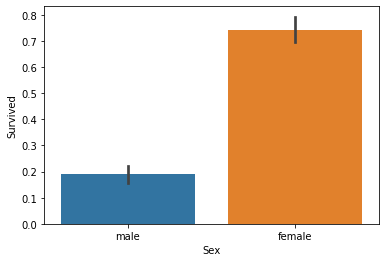

In [35]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=titanic_df)

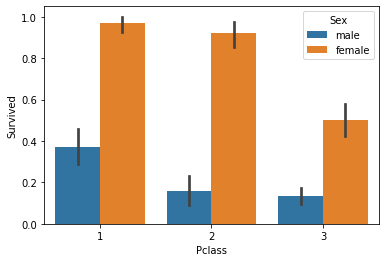

In [45]:
# 데이터 탐색 : 어떤 유형의 승객이 생존 확률이 높았는지 확인
# 성병, 부자와 가난한 사람 간의 생존 확률 : 객실 등급별 성별에 따른 생존 확률
# 여성이 남성보다 전반적으로 생존율이 높고 특히 일등석, 이등석 여성 승객의 생존율이 높다.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
# sns.barplot(x='Sex', y='Survived', data=titanic_df)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

##### 오차막대(error bar) 수정하기
seaborn은 barplot() 함수를 사용할 때 각 막대에 기본적으로 오차막대(error bar)가 함께 나타나도록 되어 있다. 막대의 길이가 길수록 자료값들이 더 많이 퍼져있다고 이해할 수 있다. 오차막대를 그리는 범위는 데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것 을 의미한다.

In [46]:
# 카테고리화 필요성
titanic_df.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [50]:
# group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Audult', 'Elderly']
# Age에 따른 생존 확률 : 범위별로 분류해 카테고리 값을 할당. 성별 연령대로 생존 확률

def get_category(age):
    cat = ''
    if age <= 5:
        cat = 'Baby'
    elif age <= 12:
        cat = 'Child'
    elif age <= 19:
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35:
        cat = 'Young Adult'
    elif age <= 60:
        cat = 'Audult'
    else :
        cat = 'Elderly'
    
    return cat

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df[['Age', 'Age_cat']].head()

,Age,Age_cat
0,22.0,Student
1,38.0,Audult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


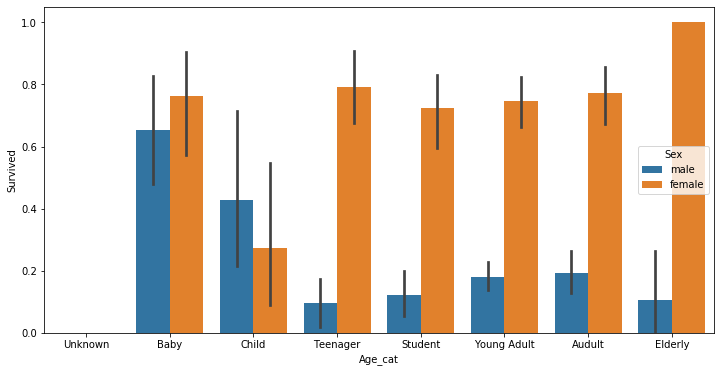

In [51]:
# titanic_df['Age_cat'].unique()
# 인사이트 : Baby의 생존율이 높고 Child를 제외한 모든 연령대에서 여성 승객의 생존율이 높다
# Sex, Age, Pclass생존율에 영향을 미치는 중요한 feature임을 확인할 수 있다.

plt.figure(figsize=(12,6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Audult', 'Elderly']
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)